# 数据科学流程

## 3.1 探索性数据分析-EDA

petal_width,False,True
petal_length,,
False,56,1
True,4,89


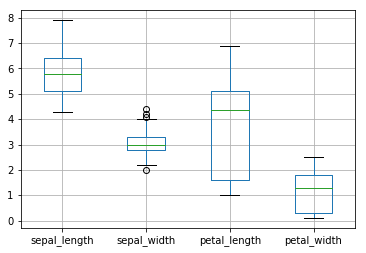

In [1]:
%matplotlib inline
import pandas as pd

iris_filename = 'iris.csv'
iris = pd.read_csv(iris_filename, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])

iris.head()
iris.describe() 
#如果需要其他分位数的值（如10%和90%）
iris.quantile([0.1,0.9])
iris.boxplot()

#计算中位数、均值和标准差分别使用：.median()、.mean()和.std()
# 对于分类特征，获得水平信息（即特征决定的类别差异）
iris.target.unique()
#查看特征之间的关系，可以创建一个共生矩阵
# 记录pental_length特征大于均值的次数，将该值与pental_width特征大于均值的次数进行比较，发现：2种特征与均值的比较几乎总是同时发生，因此，
# 可以假设这2个事件之间有很强的关系。
pd.crosstab(iris['petal_length']>iris['petal_length'].mean(),iris['petal_width']>iris['petal_width'].mean())

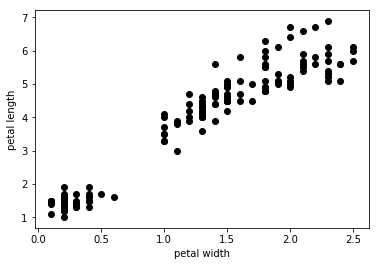

In [2]:
# 可视化关系
import matplotlib.pyplot as plt
plt.scatter(iris['petal_width'],iris['petal_length'],alpha=1.0,color='k')
plt.xlabel('petal width')
plt.ylabel('petal length')

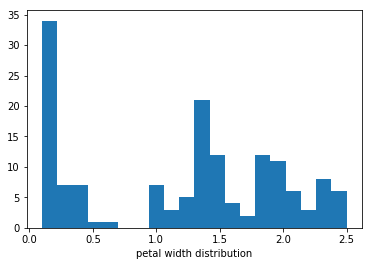

In [27]:
# 直方图近似表示特征的概率分布，对于不同的概率分布，可以有区别的对待不同的特征，以达到最大的分类和回归性能
plt.hist(iris['petal_width'], bins=20) # bins为分箱数，其初始值是观测数量的平方根（需要不断修正）
plt.xlabel('petal width distribution')

## 3.2 特征创建 

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
cali = datasets.california_housing.fetch_california_housing()
x = cali['data']
y = cali['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

d:\program files\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)
y_est = regressor.predict(x_test)
print "MAE", mean_squared_error(y_test,y_est)

MAE 1.12466186403


In [7]:
# 将特征映射为均值为0，标准差为1的新特征
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
regressor = KNeighborsRegressor()
regressor.fit(x_train_scaled,y_train)
y_est = regressor.predict(x_test_scaled)
print "MAE", mean_squared_error(y_test,y_est)

MAE 0.43944666578


In [11]:
non_linear_feat = 5
# Createing new feature (square root of it)
# Then, it's attached to dataset
# The operation is done for both train and test set

x_train_new_feat = np.sqrt(x_train[:,non_linear_feat])
x_train_new_feat.shape = (x_train_new_feat.shape[0],1)
x_train_extended = np.hstack([x_train, x_train_new_feat])

x_test_new_feat = np.sqrt(x_test[:,non_linear_feat])
x_test_new_feat.shape = (x_test_new_feat.shape[0],1)
x_test_extended = np.hstack([x_test, x_test_new_feat])

scaler = StandardScaler()

x_train_extended_scaled = scaler.fit_transform(x_train_extended)
x_test_extended_scaled = scaler.fit_transform(x_test_extended)

regressor = KNeighborsRegressor()
regressor.fit(x_train_scaled,y_train)
y_est = regressor.predict(x_test_scaled)
print "MAE", mean_squared_error(y_test,y_est)

MAE 0.43944666578


## 3.3 维数约简

### 3.3.1 协方差矩阵

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print iris.feature_names
cov_data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

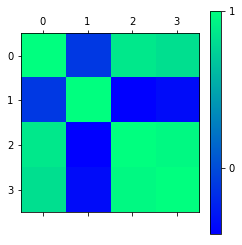

In [13]:
import matplotlib.pyplot as plt

img = plt.matshow(cov_data, cmap=plt.cm.winter)
plt.colorbar(img, ticks=[-1,0,1])

### 3.3.2 主成分分析

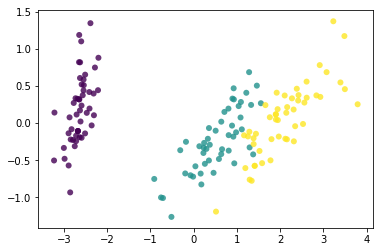

0.97763177502480314

In [16]:
from sklearn.decomposition import PCA

pca_2c = PCA(n_components=2)
x_pca_2c = pca_2c.fit_transform(iris.data)
x_pca_2c.shape
plt.scatter(x_pca_2c[:,0], x_pca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [ ]:
pca_2c.components_

# 第4章 机器学习

### 4.1 线性和逻辑回归

In [65]:
# 加载并分割数据为训练集和测试集
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
'''
参数random_state，用途是在随机划分训练集和测试集时候，划分的结果并不是那么随机，
也即，确定下来random_state是某个值后，重复调用这个函数，划分结果是确定的
'''
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2,random_state=0)

In [66]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
from sklearn.metrics import mean_absolute_error
print "MSE", mean_absolute_error(y_test, y_pred)

MSE 3.84281058945


In [67]:
%timeit regr.fit(x_train,y_train)

1000 loops, best of 3: 557 µs per loop


In [68]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

avg_price_house = np.average(boston.target)

high_priced_idx = (y_train>=avg_price_house)
y_train[high_priced_idx] = 1
y_train[np.logical_not(high_priced_idx)] = 0
y_train = y_train.astype(np.int8)

high_priced_idx = (y_test>=avg_price_house)
y_test[high_priced_idx] = 1
y_test[np.logical_not(high_priced_idx)] = 0
y_test = y_test.astype(np.int8)

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



## 4.2 朴素贝叶斯

In [69]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,random_state=0)
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



## 4.3 K近邻

In [ ]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

mnist = fetch_mldata('MNIST original',data_home='D:/mldata/')
mnist.data, nmist.target = shuffle(mnist.data, nmist.target)

mnist.data = mnist.data[:1000]
nmist.target = nmist.target[:1000]

x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.8,random_state=0)
# KNN: K=10, default measure of distance (euclidean)
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print classification_report(y_test, y_pred)

## 4.4 高级非线性算法

### 4.4.1 基于SVM的分类算法

In [81]:
import urllib2
from sklearn.datasets import load_svmlight_file

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnnl.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())

x_train, y_train = load_svmlight_file('ijcnnl.bz2')
first_rows = 2500  # 只取2500个样本,一共25000个
x_train, y_train = x_train[:first_rows,:], y_train[:first_rows]

In [83]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC

hypothesis = SVC(kernel='rbf', degree=2, random_state=101)
# n_jobs=-1代表将受用计算机上的所有cpu计算
scores = cross_val_score(hypothesis, x_train, y_train, cv=5, scoring='accuracy', n_jobs=2)

print "SVC with rbf kernel -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

SVC with rbf kernel -> cross validation accaurcy: mean = 0.910 std = 0.001


In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())

x_train, y_train = load_svmlight_file('poker.bz2')

hot_encoding = OneHotEncoder(sparse=True)
x_train = hot_encoding.fit_transform(x_train.toarray())

hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print "LinearSVC -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

LinearSVC -> cross validation accaurcy: mean = 0.490 std = 0.004


### 4.4.2 基于SVM的回归算法

In [88]:
# 加利福尼亚州实际房地产价格数据集
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
x_train, y_train = load_svmlight_file(urllib2.urlopen(target_page))

from sklearn.preprocessing import scale
first_rows = 2000

x_train = scale(x_train[:first_rows,:].toarray())   # 特征归一化
y_train = y_train[:first_rows]/1000

from sklearn.svm import SVR

hypothesis = SVR()
scores = cross_val_score(hypothesis, x_train, y_train, cv=3, scoring='mean_absolute_error', n_jobs=-1)

print "SVR -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

SVR -> cross validation accaurcy: mean = -57.838 std = 7.145


### 4.4.3 调整SVM

In [91]:
# 处理特征尺度和类不平衡问题
'''
C: 惩罚参数,减小它将会增加噪声数据的惩罚力度.建议的搜索范围为np.logspace(-3,3,7)
Kernel: 常用的核函数为linear和rbf
Degree: 使用rbf时,从2到5一个一个的尝试
Gamma: 仅仅用于rbf核函数中,值越大数据拟合越好.建议的搜索区间为np.logspace(-3,3,7)
Nu: 对NuSVC和NuSVR而言,该参数近似的表示训练错误占支持向量的比例,在[0,1]范围内取值
Epsilon: 该参数描述对每个训练观测值得你能接受的错误值是多少.建议的搜索范围是np.insert(np.logspace(-4,2,7,base=2),0,[0])
loss和penalty: 对于LinearSVC,参数接受(11,12)、(12,11)和(12,12)的组合，其中(12,12)组合实际上将LinearSVC转化为SVC(kernel='linear')
'''
x_train, y_train = load_svmlight_file('ijcnnl.bz2')
first_rows = 2500
x_train, y_train = x_train[:first_rows,:], y_train[:first_rows]

from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV

hypothesis = SVC(kernel='rbf', random_state=101)

search_dict = {'degree':[2,3], 'C':[0.01,0.1,1,10,100,1000], 'gamma':[0.1,0.01,0.001,0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis, param_distributions=search_dict, n_iter=30, scoring='accuracy',
                                n_jobs=-1, iid=True, refit=True, cv=5, random_state=101)
search_func.fit(x_train,y_train)
print 'Best parameters %s' % search_func.best_params_
print 'Cross validation accuracy: mean = %0.3f' % search_func.best_score_

Best parameters {'C': 100, 'degree': 3, 'gamma': 0.1}
Cross validation accuracy: mean = 0.998


## 4.5 组合策略

In [93]:
from sklearn.datasets import fetch_covtype
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)

print covertype_dataset.DESCR

covertype_x = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]

covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 
              'Aspen', 'Douglas-fir', 'Krummholz']

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



### 4.5.1 基于随机样本的粘合策略

### 4.5.2 基于弱组合的分袋策略

In [5]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_covtype
import numpy as np

covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
covertype_x = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]

hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), max_samples=0.7, max_features=0.7, n_estimators=100)

scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print "BaggingClassifier -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

BaggingClassifier -> cross validation accaurcy: mean = 0.796 std = 0.004


### 5.4.3 随机子空间和随机分片

In [6]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_covtype
import numpy as np

covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
covertype_x = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]

'''
超参数说明
max_features: 表示每次划分呈现给算法的采样特征的数目,每次划分能真实地决定算法的性能.该数目越低,偏差越高
min_samples_leaf: 树的深度,数值越大会减少方差,增加偏差
bootstrap: 布尔值,决定算法是否执行bootstrapping
n_estimators: 树的个数,树越多,性能越好, 计算代价越高
'''
hypothesis = RandomForestClassifier(n_estimators=100,random_state=101)
scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print "RandomForestClassifier -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

RandomForestClassifier -> cross validation accaurcy: mean = 0.809 std = 0.009


In [7]:
from sklearn.ensemble import ExtraTreesClassifier

hypothesis = ExtraTreesClassifier(n_estimators=100,random_state=101)
scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print "ExtraTreesClassifier -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

ExtraTreesClassifier -> cross validation accaurcy: mean = 0.821 std = 0.009


In [10]:
# 基于加利福尼亚房价数据的回归案例
import urllib2
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file

x_train, y_train = load_svmlight_file(urllib2.urlopen(target_page))
from sklearn.preprocessing import scale
first_rows = 2000

x_train = scale(x_train[:first_rows,:].toarray())   # 特征归一化
y_train = y_train[:first_rows]/1000

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np

hypothesis = RandomForestClassifier(n_estimators=300,random_state=101)
scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='mean_absolute_error', n_jobs=-1)

print "RandomForestClassifier -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

RandomForestClassifier -> cross validation accaurcy: mean = -0.339 std = 0.009


### 4.5.4 模型序列-AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_covtype

covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
covertype_x, covertype_y = covertype_dataset.data[:15000,:],covertype_dataset.target[:15000]

hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print "AdaBoost -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

AdaBoost -> cross validation accaurcy: mean = 0.622 std = 0.006


### 4.5.5 梯度提升树

In [13]:
'''
该算法是Boosting的另一个版本,与AdaBoost类似. 基于一个梯度下降函数. 尽管其方差比较大, 对噪声比较敏感(这2个问题可以通过子采样得到缓解), 
非并行化计算使得计算费用增加. 从组合的角度看该算法被证实为表现最好的算法之一
'''
import urllib2
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_svmlight_file
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())

x_train, y_train = load_svmlight_file('poker.bz2')
hot_encoding = OneHotEncoder(sparse=True)
x_train = hot_encoding.fit_transform(x_train.toarray()).toarray()[:2500,:]
y_train = y_train[:2500]

'''
GradientBoostingClassifier和GradientBoostingRegression中的超参数说明
n_estimators: 使用过多的估计模型会增加方差,但如果估计模型过少,算法又会出现高偏差
max_depth: 增大该值会增加方差和复杂度
subsample: 通过该参数可以有效降低方差
learning_rate: 需要更多的估计模型才能收敛,因此也需要更多的训练时间,但在训练过程中更小的参数值能改进算法的优化性能
min_sample_leaf: 该参数能减少因噪声数据带来的方差,保留对稀有样本的过拟合
'''
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
hypothesis = GradientBoostingClassifier(max_depth=5, n_estimators=300,random_state=101)
scores = cross_val_score(hypothesis, covertype_x, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print "GradientBoostingClassifier -> cross validation accaurcy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))    

GradientBoostingClassifier -> cross validation accaurcy: mean = 0.802 std = 0.008


###  4.5.6 处理大数据

In [ ]:
# 1. 创建一些大数据集作为范例, 使用fetch_20newsgroups文本数据集, 包含11314个帖子, 每个帖子平均包含 206个词,出现在20个不同的新闻组中
import numpy as np
from sklearn.datasets import fetch_20newsgroups

newsgroups_dataset = fetch_20newsgroups(shuffle=True, remove=('headers','footers','quotes'), random_state=6)
print 'Posts inside the data: %s' % np.shape(newsgroups_dataset.data)
print 'Average number of words for post: %0.0f' % np.mean([len(text.split(' ')) for text in newsgroups_dataset.data])

from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10**5, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,x]
np.savetxt('huge_dataset_10__5.scv', D, delimiter=",") # the saved file should be around 14,6MB
del(D, x, y)

x,y = make_classification(n_samples=10**6, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,x]
np.savetxt('huge_dataset_10__6.scv', D, delimiter=",") # the saved file should be around 146MB
del(D, x, y)

x,y = make_classification(n_samples=10**7, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,x]
np.savetxt('huge_dataset_10__7.scv', D, delimiter=",") # the saved file should be around 1,46G
del(D, x, y)


# 创建和使用任何数据集后, 可以使用以下命令删除他们:
import os
os.remove('huge_dataset_10__5.csv')
os.remove('huge_dataset_10__6.csv')
os.remove('huge_dataset_10__7.csv')

# 2. 对容量的可扩展性
from sklearn.linear_model import SGDClassifier
import sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

streaming = pd.read_csv('huge_dataset_10__7.csv', header=None, chunksize=10000)

learner = SGDClassifier(loss='log')
minmax_scaler = MinMaxScaler(feature_range=(0,1))  #记录第一批数据的变量范围

cumulative_accuracy = list()
for n,chunk in enumerate(streaming):
    if n == 0:
        minmax_scaler.fit(chunk.ix[:,1:].values)
    X = minmax_scaler.transform(chunk.ix[:,1:].values)
    X[X>1] = 1
    X[X<0] = 0
    y = chunk.ix[:,0]
    if n > 8:
        cumulative_accuracy.append(learner.score(X,y))
    learner.partial_fit(X,y,classes=np.unique(y))
print 'Propressive validation mean accuracy %0.3f' % np.mean(cumulative_accuracy)

# 速度
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
import numpy as np
from datetime import datetime

'''
SGD算法,包括SGDClassfier and SGDRegressor需要调整的关键超参数
n_iter: 数据上迭代的次数;迭代次数越多,算法优化的越好.但存在过拟合的高风险.
penalty: 惩罚方法 l1、l2和elasticnet(弹性网，l1和l2策略的混合), l1倾向于将没有帮助的系数减小到0， l2仅仅是将他们变弱。
alpha: 正则项乘子，值越高，则正则化的程度也越高，建议使用范围从10(-7)到10(-1)的网格搜索来找到最优alpha值
l1_ratio: 用于惩罚弹性网正则项
learning_rate: 用于设置系数受每单个样本的影响程度。
epsilon: 当损失函数为huber、epsilon_insensitive或squared_epsilon_insensitive时使用
shuffle: 如果设置为True,算法将调整数据的次序以改善学习的泛化性
'''

classifiers = {
    'SGDClassifier hinge loss' : SGDClassifier(loss='hinge', random_state=101),
    'SGDClassifier log loss' : SGDClassifier(loss='log', random_state=101),
    'Perceptron' : Perceptron(random_state=101),
    'BernoulliNB' : BernoulliNB(),
    'PassiveAggressiveClassifier' : PassiveAggressiveClassifier(random_state=101)
}
huge_dataset = 'huge_dataset_10__6.csv'
for algorithm in classifiers:
    start = datetime.now()
    minmax_scaler = MinMaxScaler(feature_range=(0,1))
    streaming = pd.read_csv('huge_dataset', header=None, chunksize=100)
    learner = classifiers[algorithm]
    cumulative_accuracy = list()
    for n,chunk in enumerate(streaming):
        y = chunk.ix[:,0]
        X = chunk.ix[:,1:]
        if n > 50:
            cumulative_accuracy.append(learner.score(X,y))
        learner.partial_fit(X,y,classes=np.unique(y))
elapsed_time = datetime.now() - start
print algorithm + ' : mean accuracy %0.3f in %s secs' % (np.mean(cumulative_accuracy), elapsed_time.total_seconds())

# 4.处理多样性--散列技巧
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer

def streaming():
    for response, item in zip(newsgroup_dataset.target, newsgrours_dataset.data):
        yield response, item
hashing_trick = HashingVectorizer(stop_words='english', norm='12',non_negative=True)
learner = SGDClassifier(random_state=101)
texts = list()
targets = list()
for n, (target,text) in enumerate(streaming()):
    texts.append(text)
    targets.append(target)
    if n%1000 == 0 and n > 0:
        learning_chunk = hashing_trick.transform(texts)
        if n > 1000:
            last_validation_score = learner.score(learning_chunk, targets)
        learner.partial_fit(learning_chunk, targets, classes=[k for k in range(20)])
        texts, targets = list(), list()
print 'Last validation score: %0.3f' % last_validation_score

## 4.6 自然语言处理

### 4.6.1 词语分词

In [2]:
import nltk  # 需要安装

my_text = "The coolest job in the next 10 years will be statisticians. People think I am joking"
simple_tokens = my_text.split(' ')

nltk_tokens = nltk.word_tokenize(my_text)
print nltk_tokens

ImportError: No module named nltk

### 4.6.2 词干提取

In [ ]:
from nltk.stem import *
stemmer = LancasterStemmer()
print [stemmer.stem(word) for word in nltk_tokens]

### 4.6.3 词性标注

In [ ]:
import nltk
print nltk.pos_tag(nltk_tokens)

### 4.6.4 命名实体识别

In [ ]:
import nltk
chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(my_text)))
print chunks

### 4.6.5 停止词

In [ ]:
import nltk
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print stop_words

### 4.6.6 完整案例-分本分类

In [ ]:
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

categories = ['sci.med', 'sci.space']
to_remove = ['headers', 'footers', 'quotes']

twenty_sci_news_train = fetch_20newsgroups(subset='train',remove=to_remove, categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test',remove=to_remove, categories=categories)

# 使用TFI-DF对文本数据进行预处理
tf_vect = TfidfVectorizer()
x_train = tf_vect.fit_transform(twenty_sci_news_train.data)
x_test = tf_vect.fit_transform(twenty_sci_news_test.data)

y_train = twenty_sci_news_train.target
y_test = twenty_sci_news_test.target

clf = SGDClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print 'Accuracy=', accuracy_score(y_test,y_pred)

'''
进行单词的大小写转换,分词,词干提取和重建数据集中的每一个文档
'''
def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for work in tokens if word not in stop stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ",join(stem_stokens)

cleaned_docs_train = [clean_and_stem_text(text) for text in twenty_sci_news_train.data]
cleaned_docs_test = [clean_and_stem_text(text) for text in twenty_sci_news_test.data]

x1_train = tf_vect.fit_transform(cleaned_docs_train)
x1_test = tf_vect.fit_transform(cleaned_docs_test)

clf.fit(x1_train,y_train)
y_pred = clf.predict(x1_test)

print 'Accuracy=', accuracy_score(y_test,y_pred)

## 4.7 无监督学习

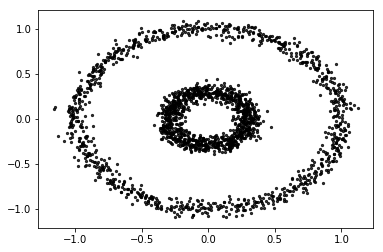

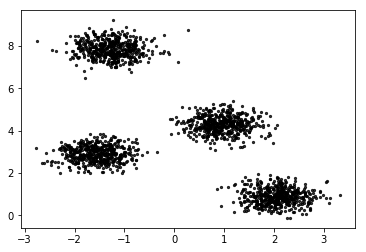

In [1]:
# K-均值算法
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

N_sample = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_sample, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_sample, centers=4, cluster_std=0.4, random_state=0)[0])

plt.scatter(dataset_1[:,0], dataset_1[:,1], c='k', alpha=0.8, s=5.0)
plt.show()

plt.scatter(dataset_2[:,0], dataset_2[:,1], c='k', alpha=0.8, s=5.0)
plt.show()

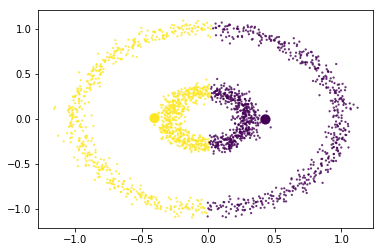

In [6]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters = K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_

plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha = 0.8, s = 5.0, lw = 0)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s = 100, c=np.unique(labels_1), lw = 0.2)
plt.show()

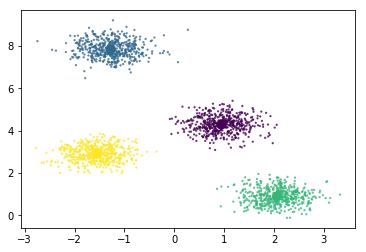

In [7]:
K_dataset_2 = 4
km_2 = KMeans(n_clusters = K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_

plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha = 0.8, s = 5.0, lw = 0)
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], s = 100, c=np.unique(labels_2), lw = 0.2)
plt.show()

### 基于密度的聚类 DBSCAN

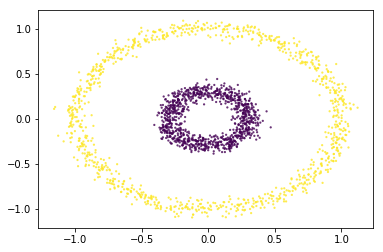

array([0, 1], dtype=int64)

In [10]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps = 0.25)
labels_1 = dbs_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha = 0.8, s = 5.0, lw = 0)
plt.show()

np.unique(labels_1)


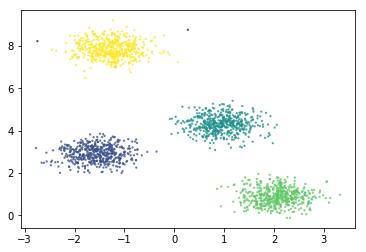

array([-1,  0,  1,  2,  3], dtype=int64)

In [14]:
dbs_2 = DBSCAN(eps = 0.5)
labels_2 = dbs_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha = 0.8, s = 5.0, lw = 0)
plt.show()

np.unique(labels_2)

# 第五章 社会网络分析

In [ ]:
%matplotlib inline
# import networkx as nx

# 第六章 数据可视化

## 6.1 matplotlib基础介绍

### 6.1.1 曲线绘图

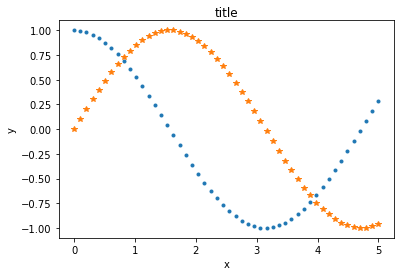

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,5,50) #创建一个从0到5等间距,具有50个样本的数字序列
y_cos = np.cos(x)
y_sin = np.sin(x)

# rcParams['axes.color_cycle'] = ['red','blue','green'] 申明喜欢的颜色序列来定制颜色

plt.figure()       # initialize a figure
plt.plot(x,y_cos,'.')  # plot series of coordinates as a line
plt.plot(x,y_sin,'*')
plt.xlabel('x')    # adds label to x axis
plt.ylabel('y')
plt.title('title') # adds a title
plt.show()

### 6.1.2 绘制分块图

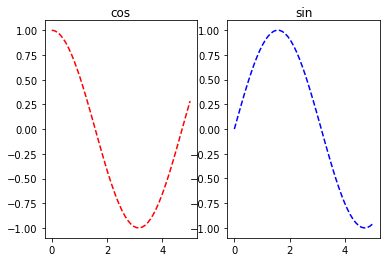

In [21]:
plt.subplot(1,2,1) # define 1 row 2 column panel, activates figure 1
plt.plot(x,y_cos,'r--')
plt.title('cos')
plt.subplot(1,2,2) # define 1 row 2 column panel, activates figure 2
plt.plot(x,y_sin,'b--')
plt.title('sin')
plt.show()

### 6.1.3 绘制分块图

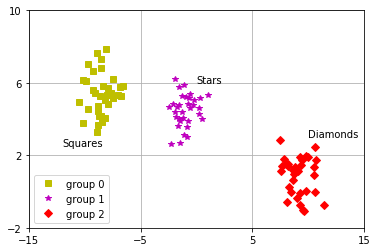

In [22]:
from sklearn.datasets import make_blobs

D = make_blobs(n_samples=100, n_features=2, centers=3, random_state=7)
groups = D[1]
coordinates = D[0]

plt.plot(coordinates[groups==0,0], coordinates[groups==0,1],'ys', label='group 0') # yellow square
plt.plot(coordinates[groups==1,0], coordinates[groups==1,1],'m*', label='group 1') # magenta stars
plt.plot(coordinates[groups==2,0], coordinates[groups==2,1],'rD', label='group 2') # red diamonds

plt.ylim(-2,10) # redefines the limits of y axis
plt.yticks([10,6,2,-2]) # redefines y axis ticks
plt.xticks([-15,-5,5,15]) # redefines x axis ticks

plt.grid() # adds a grid

plt.annotate('Squares',(-12,2.5)) # prints text at coordinates, (-12,2.5) 代表文字显示的位置坐标
plt.annotate('Stars',(0,6))
plt.annotate('Diamonds',(10,3))

plt.legend(loc='lower left', numpoints=1) # places a legend of labelled items

plt.show()

### 6.1.4 直方图

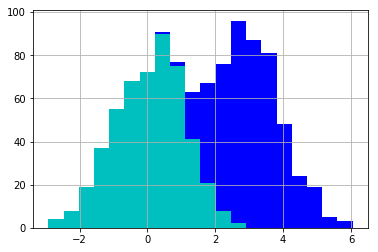

In [23]:
# 一般情况下,10-20个分箱更有利于对分布的理解
# 最佳分箱数确定：
# 分箱宽度 h = 2*IQR*n(-1/3)  其中IQR为四分位间距   分箱数 bins = (max-min)/h
x = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)
plt.hist(np.column_stack((x,z)), bins=20, histtype='bar', color=['c','b'], stacked=True)  # histtype='step'
plt.grid()
plt.show()

### 6.1.4 柱状图

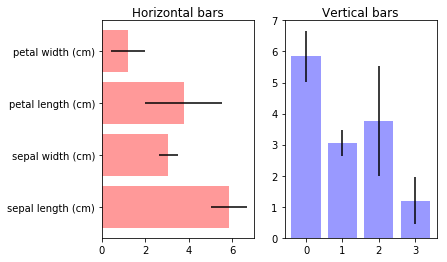

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
average = np.mean(iris.data, axis=0)
std     = np.std(iris.data, axis=0)
range_  = range(np.shape(iris.data)[1])

plt.subplot(1,2,1) # define 1 row 2 column panel, activates figure 1
plt.title('Horizontal bars')
plt.barh(range_, average, color='r', xerr=std, alpha=0.4, align='center')
plt.yticks(range_, iris.feature_names)

plt.subplot(1,2,2) # define 1 row 2 column panel, activates figure 2
plt.title('Vertical bars')
plt.bar(range_, average, color='b', yerr=std, alpha=0.4, align='center')  # alpha设置条形柱的透明度（0.0-1.0）
plt.xticks(range_, range_)  #第一个参数表示设置在坐标轴上的详细刻度数，第二个参数表示放置在刻度上的标签

plt.show()

### 6.1.5 图像可视化

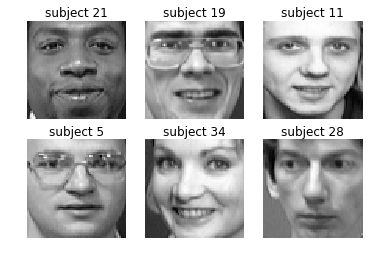

In [25]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True, random_state=5)
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.imshow(dataset.data[k].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest') # nearest 用于平滑图像
    plt.title('subject ' + str(dataset.target[k]))
    plt.axis('off')
plt.show()


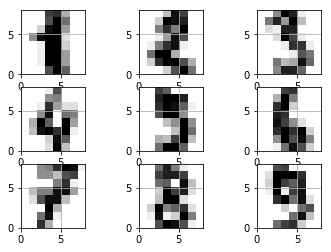

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3,3,number)
    # 使像素和网格对齐，使用提供最大值和最小值列表的extent参数
    plt.imshow(digits.images[number], cmap='binary', interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

## 6.2 pandas的几个图形示例

In [27]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])

### 6.2.1 箱线图和直方图

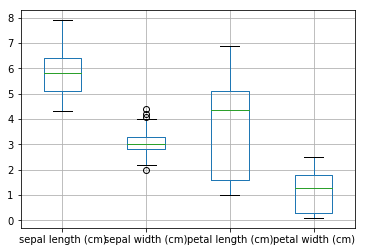

In [28]:
boxplots = iris_df.boxplot(return_type='axes')

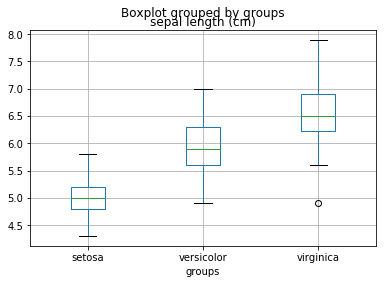

In [29]:
boxplots = iris_df.boxplot(column='sepal length (cm)', by='groups', return_type='axes')

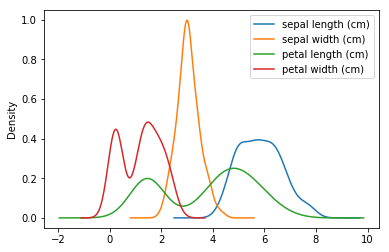

In [30]:
densityplot = iris_df.plot(kind='density')

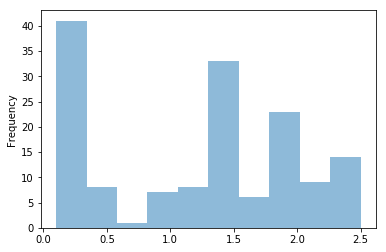

In [31]:
single_distribution = iris_df['petal width (cm)'].plot(kind='hist', alpha=0.5)

### 6.2.2 散点图

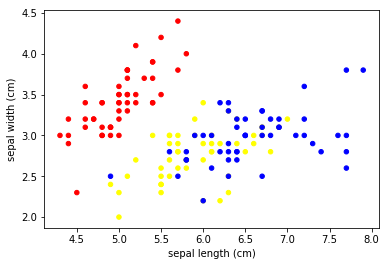

In [32]:
colors_palette = {0:'red', 1:'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter', x=0, y=1, c=colors)

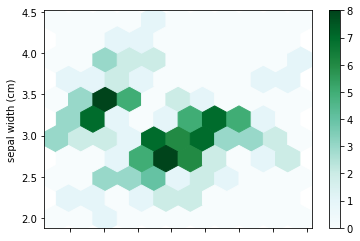

In [33]:
hexbin = iris_df.plot(kind='hexbin', x=0, y=1, gridsize=10)

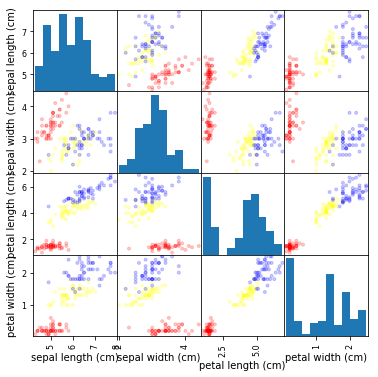

In [34]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:'red', 1:'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
# alpha设置透明度，figsize提供矩阵的宽度和高度（英寸），diagonal可选择'kde'和'hist'，对角线显示密度曲线和直方图
matrix_of_scatterplots = scatter_matrix(iris_df, alpha=0.2, figsize=(6,6), c=colors, diagonal='hist')

### 6.2.3 平行坐标

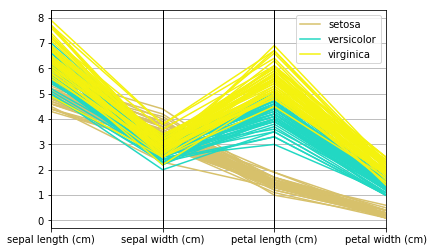

In [35]:
from pandas.tools.plotting import parallel_coordinates
pll = parallel_coordinates(iris_df, 'groups')

## 6.3 高级数据表示学习

### 6.3.1 学习曲线

d:\program files\python27\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


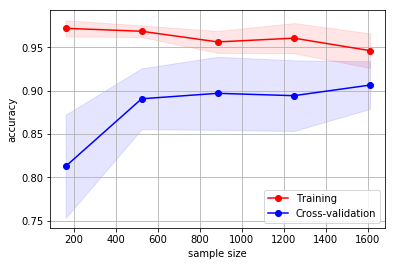

In [36]:
from sklearn.learning_curve import learning_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
digits = load_digits()

X,y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis, X,
                                                      y, train_sizes=np.linspace(0.1,1.0,5), cv=10,
                                                      scoring='accuracy', exploit_incremental_learning=False,
                                                      n_jobs=-1)
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)

plt.plot(train_size, mean_train, 'ro-', label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
plt.plot(train_size, mean_test, 'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')

plt.grid()

plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints=1)
plt.show()

### 6.3.2 验证曲线

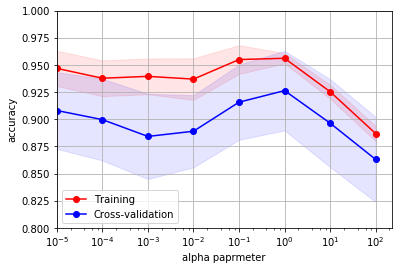

In [37]:
from sklearn.learning_curve import validation_curve
testing_range = np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, X, y, param_name='alpha', param_range=testing_range,
                                             cv=10, scoring='accuracy', n_jobs=-1)
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)

plt.semilogx(testing_range, mean_train, 'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.semilogx(testing_range, mean_test, 'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')

plt.grid()

plt.xlabel('alpha paprmeter')
plt.ylabel('accuracy')
plt.ylim(0.8,1.0)
plt.legend(loc='lower left', numpoints=1)
plt.show()

### 6.3.3 特征重要性

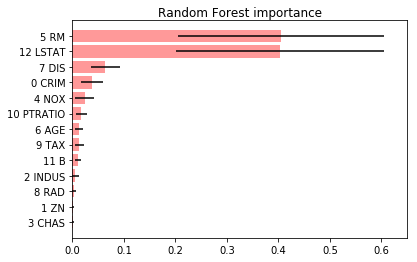

In [38]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X, y  = boston.data, boston.target
feature_names= np.array([' '.join([str(b),a]) for a,b in zip(boston.feature_names, range(len(boston.feature_names)))])

RF = RandomForestRegressor(n_estimators=100, random_state=101).fit(X,y)
importance = np.mean([tree.feature_importances_ for tree in RF.estimators_], axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

indices = np.argsort(importance)
range_ = range(len(importance))

plt.figure()
plt.title('Random Forest importance')
plt.barh(range_, importance[indices], color='r', xerr=std[indices],alpha=0.4,align='center')
plt.yticks(range(len(importance)),feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()


### 6.3.4 GBT部分依赖关系图

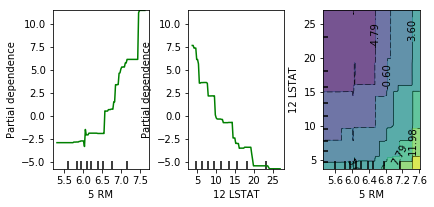

In [39]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

GBM = GradientBoostingRegressor(n_estimators=100, random_state=101).fit(X,y)
features = [5,12,[5,12]]
fig, axis = plot_partial_dependence(GBM, X, features, feature_names=feature_names)

In [3]:
c

4

In [4]:
def add(a,b):
    c=a+b
    return c
e =add(1,2)
e

3

In [12]:
def chen(a):
    return a*a
    

In [13]:
c=chen(3)
c

9

In [22]:
def chu(c,d):
    return c/d

print chu(10.0,3)

3.33333333333


In [17]:
def jian(e,f):
    return e-f
print jian(9,3)

6


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [4]:
clf.tree_.value[(0,0)]

array([ 50.,  50.,  50.])

In [5]:
group_member = clf.apply(iris.data, check_input = True)

In [8]:
group_member

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5, 15,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5,  5,  5, 10,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16, 16,
       16, 16, 16, 16,  6, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        8, 16, 16, 16, 16, 16, 16, 14, 16, 16, 11, 16, 16, 16,  8,  8, 16,
       16, 16, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], dtype=int64)

In [9]:
len(iris.data)

150

In [10]:
len(group_member)

150

In [11]:
max(group_member)

16